In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import date

# to get the data from Yahoo Finance
#pip install pandas-datareader
#pip install yfinance

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
# the function to calculate the realized vol

def calculate_realized_vol(time_series, window_size, freq): 
    # freq defines the number of trading periods in a year: for daily data freq = 365, for hourly data freq = 365*24
    
    returns = np.log(time_series/time_series.shift(1))
    returns.fillna(0, inplace=True)
    realized_vol = returns.rolling(window=window_size).std()*np.sqrt(freq) * 100
    
    return realized_vol

In [3]:
# the function to calculate the realized vol

def calculate_correlation(series_1, series_2, window_size): 
    
    corr = series_1.rolling(window=window_size).corr(series_2)
    
    return corr

In [4]:
# data from a public API: daily data is enough so we use the open API from Yahoo.com

start = '2020-01-01'
end = date.today().strftime("%Y-%m-%d")
freq = 12 * 30 # for daily data

# for BTC
df_BTCUSD = pdr.get_data_yahoo('BTC-USD', start=start, end=end)
df_BTCUSD.reset_index(inplace=True)
df_BTCJPY = pdr.get_data_yahoo('BTC-JPY', start=start, end=end)
df_BTCJPY.reset_index(inplace=True)

# for ETH
df_ETHUSD = pdr.get_data_yahoo('ETH-USD', start=start, end=end)
df_ETHUSD.reset_index(inplace=True)
df_ETHJPY = pdr.get_data_yahoo('ETH-JPY', start=start, end=end)
df_ETHJPY.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
# realized vol calculation

windows = [15, 30, 90, 180, 360]

df = pd.DataFrame()
df['Date'] = df_BTCJPY['Date']

for window in windows: 

    df['BTCJPY_RV' + '_' + str(window)] = calculate_realized_vol(df_BTCJPY['Close'], window, freq)
    df['BTCUSD_RV' + '_' + str(window)] = calculate_realized_vol(df_BTCUSD['Close'], window, freq)
    df['ETHJPY_RV' + '_' + str(window)] = calculate_realized_vol(df_ETHJPY['Close'], window, freq)
    df['ETHUSD_RV' + '_' + str(window)] = calculate_realized_vol(df_ETHUSD['Close'], window, freq)

    df['BTC_diff' + '_' + str(window)] = (df['BTCJPY_RV' + '_' + str(window)] - df['BTCUSD_RV' + '_' + str(window)])
    df['ETH_diff' + '_' + str(window)] = (df['ETHJPY_RV' + '_' + str(window)] - df['ETHUSD_RV' + '_' + str(window)])

    df['BTC_vol_corr' + '_' + str(window)] = calculate_correlation(df['BTCJPY_RV' + '_' + str(window)], df['BTCUSD_RV' + '_' + str(window)], window)
    df['ETH_vol_corr' + '_' + str(window)] = calculate_correlation(df['ETHJPY_RV' + '_' + str(window)], df['ETHUSD_RV' + '_' + str(window)], window)

In [6]:
# calculate the min, max and current value and save into a separate dataframe

descr = df.describe()
descriptions = pd.DataFrame()
descriptions = pd.concat([descr.loc['max'], descr.loc['min'], pd.Series(df.iloc[-1], name='now')], axis=1).drop('Date')

In [16]:
# save all to excel

#today = date.today().strftime("%Y-%m-%d")

#writer = pd.ExcelWriter(today + "_" + "result.xlsx", engine="xlsxwriter")
#df.to_excel(writer, sheet_name="Values")
#descriptions.to_excel(writer, sheet_name="Descriptions")
#writer.close()

In [17]:
df

,Date,BTCJPY_RV_15,BTCUSD_RV_15,ETHJPY_RV_15,ETHUSD_RV_15,BTC_diff_15,ETH_diff_15,BTC_vol_corr_15,ETH_vol_corr_15,BTCJPY_RV_30,...,BTC_vol_corr_180,ETH_vol_corr_180,BTCJPY_RV_360,BTCUSD_RV_360,ETHJPY_RV_360,ETHUSD_RV_360,BTC_diff_360,ETH_diff_360,BTC_vol_corr_360,ETH_vol_corr_360
0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2023-06-08,56.207987,50.671339,48.602114,42.803766,5.536648,5.798348,0.932206,0.929141,42.113455,...,0.952817,0.998154,52.832947,54.157241,72.997602,74.262922,-1.324293,-1.265320,0.995769,0.973207
1255,2023-06-09,54.507286,50.608636,46.943836,42.862548,3.898651,4.081288,0.935965,0.932647,42.113474,...,0.952241,0.998246,52.830604,54.141736,72.986911,74.262788,-1.311132,-1.275877,0.995710,0.974168
1256,2023-06-10,54.272986,51.669437,46.816196,48.857028,2.603549,-2.040833,0.938987,0.932542,41.980823,...,0.951849,0.998368,52.826266,54.173755,72.982996,74.412778,-1.347489,-1.429782,0.995666,0.975079
1257,2023-06-11,54.923127,51.597632,51.877458,48.842149,3.325495,3.035309,0.935020,0.934559,42.251921,...,0.951189,0.998405,51.603432,53.190661,71.421061,72.977226,-1.587229,-1.556165,0.995642,0.976240


In [18]:
descriptions

,max,min,now
BTCJPY_RV_15,279.566100,10.871508,54.845346
BTCUSD_RV_15,269.655855,11.140771,45.463614
ETHJPY_RV_15,333.063386,13.295997,51.858391
ETHUSD_RV_15,321.880126,17.970078,42.591514
BTC_diff_15,18.990675,-12.026748,9.381732
ETH_diff_15,19.578594,-19.020413,9.266878
BTC_vol_corr_15,0.999908,0.135628,0.927658
ETH_vol_corr_15,0.999979,-0.218016,0.926422
BTCJPY_RV_30,204.954521,20.254454,42.262347
BTCUSD_RV_30,196.660674,21.152186,40.023222


In [8]:
# charts

def plot_results(window):
    # BTC: plot the results

    fig, ax = plt.subplots(figsize=(14, 4))
    df.plot(x = 'Date', y="BTCJPY_RV" + '_' + str(window), label="BTCJPY_RV" + '_' + str(window), ax=ax)
    df.plot(x = 'Date', y="BTCUSD_RV" + '_' + str(window), label="BTCUSD_RV" + '_' + str(window), ax=ax)
    ax.set(xlabel="time", ylabel="values")
    ax.grid(axis='y')
    ax.legend()
    
    # BTC: plot the difference in vol

    fig, ax = plt.subplots(figsize=(14, 4))
    df.plot(x = 'Date', y="BTC_diff" + '_' + str(window), label="BTC_diff" + '_' + str(window), ax=ax)
    ax.set(xlabel="time", ylabel="values")
    ax.grid(axis='y')
    ax.legend()
    
    # BTC: plot the corr in vol

    fig, ax = plt.subplots(figsize=(14, 4))
    df.plot(x = 'Date', y="BTC_vol_corr" + '_' + str(window), label="BTC_vol_corr" + '_' + str(window), ax=ax)
    ax.set(xlabel="time", ylabel="values")
    ax.grid(axis='y')
    ax.legend()
    
    # ETH: plot the results 

    fig, ax = plt.subplots(figsize=(14, 4))
    df.plot(x = 'Date', y="ETHJPY_RV" + '_' + str(window), label="ETHJPY_RV" + '_' + str(window), ax=ax)
    df.plot(x = 'Date', y="ETHUSD_RV" + '_' + str(window), label="ETHUSD_RV" + '_' + str(window), ax=ax)
    ax.set(xlabel="time", ylabel="values")
    ax.grid(axis='y')
    ax.legend()

    # ETH: plot the difference in vol

    fig, ax = plt.subplots(figsize=(14, 4))
    df.plot(x = 'Date', y="ETH_diff" + '_' + str(window), label="ETH_diff" + '_' + str(window), ax=ax)
    ax.set(xlabel="time", ylabel="values")
    ax.grid(axis='y')
    ax.legend()

    # ETH: plot the corr in vol

    fig, ax = plt.subplots(figsize=(14, 4))
    df.plot(x = 'Date', y="ETH_vol_corr" + '_' + str(window), label="ETH_vol_corr" + '_' + str(window), ax=ax)
    ax.set(xlabel="time", ylabel="values")
    ax.grid(axis='y')
    ax.legend()
    
    return

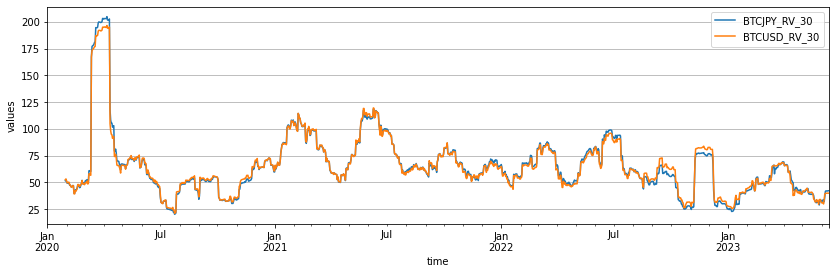

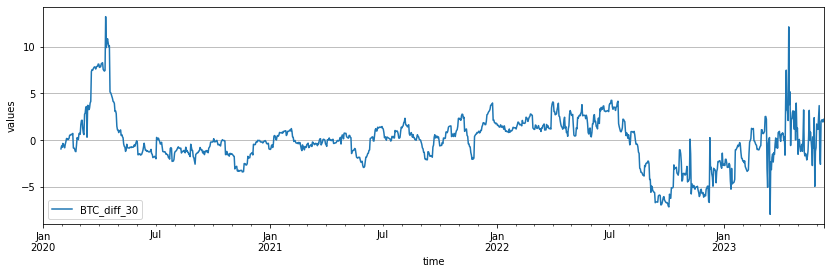

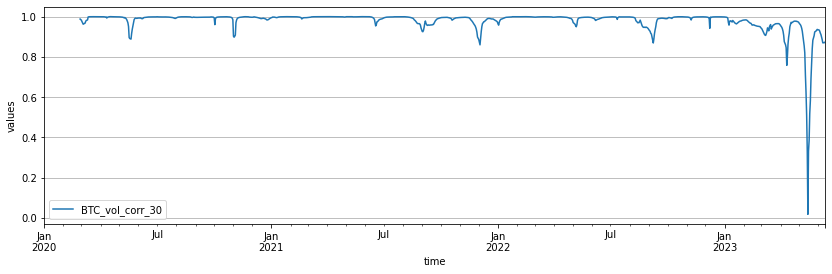

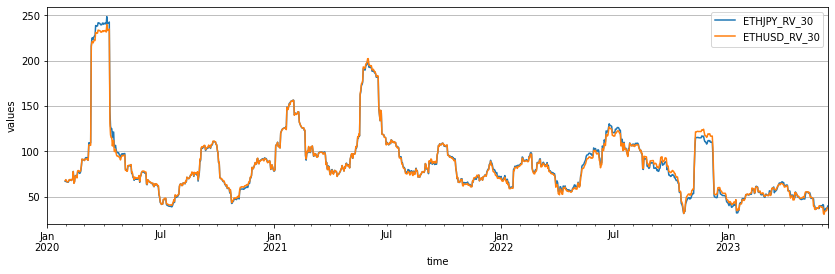

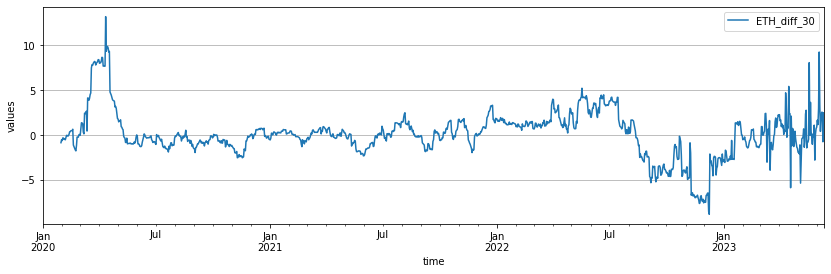

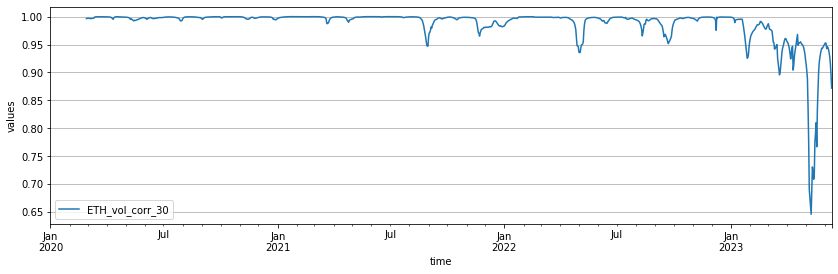

In [9]:
# charts

plot_results(30)